# **ディーラーモデルによる<br>外国為替市場のシミュレーション**
---

## 記法
- $t$: 物理時間
- $n$: tick時間
    - 取引成立ごとに1増える。
- $i$: トレーダーID
- $a_i(t)$: 時刻$t$における、トレーダー$i$の売り注文価格
- $b_i(t)$: 時刻$t$における、トレーダー$i$の買い注文価格
- $p_i(t)$: $(a_i(t)+b_i(t))/2$、すなわち売りと買いの中間価格（mid-price）。
- $s_i(t)$: $a_i(t)-b_i(t)$、すなわち、売りと買いの価格の差（スプレッド）。
- $P(n)$: $n$ tick目における市場価格


## ディーラーモデル概要
ディーラーモデルは市場に参加するトレーダーの行動に注目し、人工的に金融市場のシミュレーションを行うモデルです。
ディーラーモデルでは、各トレーダーが売り注文(<font color="Red">ask</font>)と買い注文(<font color="Red">bid</font>)の両方を同時に出していると仮定し、トレーダー間で売りと買いの注文がマッチした際に取引成立とします。
具体的には、下記 **(a)~(d)** の繰り返しと言えます。

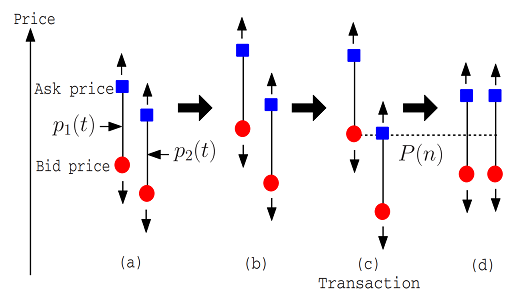

In [5]:
from IPython.display import Image
Image("fig/dealer_model_image.png") 

**(a). ランダムウォークによる注文価格更新**

ディーラーモデルではトレーダーが自身のmid-price $p_i(t)$を下記の式でランダムウォークさせることにより、注文価格を更新します。
$$
\begin{align}
  p_i(t+\Delta t) &= p_i(t) + cf_i(t) &(i\in\{1,2\}) \\
  f_i(t) &= 
  \begin{cases}
  + \Delta p &(prob. 1/2) \\
  - \Delta p &(prob. 1/2)
  \end{cases}
\end{align}
$$

**(b). 取引成立条件の確認**

ディーラーモデルでは、最良買い価格(best bid)が最良売り価格(best ask)を超えた場合に取引成立とします。つまり、下記が取引成立条件です。
$$
\begin{align}
　best\ ask &\leq best\ bid \\
  best\ ask(t) &= \min_i a_i(t)  \\
  best\ bid(t) &= \max_i b_i(t)
\end{align}
$$
ここで、取引成立しない場合は **(a)** に戻ります。

**(c). 取引成立時**

取引成立時は最良価格の中点$(best\ ask+best\ bid)/2$で取引を行い、これを市場価格$P(n)$として記録しておきます。

**(d). 取引成立後の再注文**

その後、取引を行った各トレーダーは再度$p_i(t)$を$P(n)$にして、再注文を行います。
$$
  p_i(t) = P(n)
$$

その後、再度 **(a)** に戻ります。

---

# Model 1
ディーラーモデルの最も基本的なモデルは、2人のトレーダーによる単純なランダムウォークによるモデルです。すなわち、
$$
\begin{align}
  p_i(t+\Delta t) &= p_i(t) + cf_i(t) &(i\in\{1,2\}) \\
  f_i(t) &= 
  \begin{cases}
  + \Delta p &(prob. 1/2) \\
  - \Delta p &(prob. 1/2)
  \end{cases}
\end{align}
$$

---

# Model 2
Model 2では、**トレンドフォロー**とよばれるトレーダーの戦略を考慮します。
トレンドフォローとは、直近の市場価格変化に合わせて自身の注文価格を変化させる戦略です。
トレンドフォロー付きのディーラーモデルは下記で表されます。
第2項がトレンドフォローに対応する項で、価格差$\Delta P$の重みつき平均です。
$$
\begin{align}
  p_i(t+\Delta t) &= p_i(t) +d<\Delta P>_M\Delta t + cf_i(t) &(i\in\{1,2\}) \\
  f_i(t) &= 
  \begin{cases}
  + \Delta p &(prob. 1/2) \\
  - \Delta p &(prob. 1/2)
  \end{cases} \\
  <\Delta P>_M &= \frac{2}{M(M+1)}\sum_{k=1}^{M-1}(M-k)\Delta P(M-k)
\end{align}
$$

---

# Model 3

Model 3ではトレーダー数$N$を変化させることを考えます。すなわち、モデルは下記です。

$N>2$の場合でも取引成立条件は同一です。

$$
\begin{align}
  p_i(t+\Delta t) &= p_i(t) +d<\Delta P>_M \Delta t + cf_i(t) &(i\in\{1,2,...,N\}) \\
  f_i(t) &= 
  \begin{cases}
  + \Delta p &(prob. 1/2) \\
  - \Delta p &(prob. 1/2)
  \end{cases} \\
  <\Delta P>_M &= \frac{2}{M(M+1)}\sum_{k=1}^{M-1}(M-k)\Delta P(M-k)
\end{align}
$$

---

## **Problem 1**
[Model 1](#Model-1)のシミュレーションを行ってください。
各パラメータは下記を用いてください。
10000 tick 分発生させてください。
$$
\begin{array}{c:c:c:c:c:c:c}
s    & c    & \Delta p  & \Delta t     & p_i(0) \\
\hline
0.01 & 0.01 & 0.1       & (\Delta p)^2 & 100
\end{array}
$$


<details><summary>Tips</summary>
    
大まかな流れは下記のとおりです。
```python
while True:
    if best_ask <= best_bid:
        transaction()
        continue
    random_walk()
    if tick >= 10000:
        break
```
</details>

In [ ]:
# TODO: Problem 1

## **Problem 2**
[Problem 1](#Problem-1)から得られた市場価格時系列を用いて、下記を可視化してください。
- 市場価格時系列
     - 横軸：Tick、縦軸: 市場価格$P(n)$
- 価格差$\Delta P$の自己相関関数
    - 横軸：$\Delta P$、縦軸：CDF
- ボラティリティ$|\Delta P|$の累積分布（CDF）
    - 横軸：$K$、縦軸$C_{\Delta P}(K)$

<details><summary>Tips</summary>
$$
C_{\Delta P}(K) = \frac{<\Delta P(n+K) \Delta P(n)>}{<\Delta P(n)^2>}
$$
</details>

In [ ]:
# TODO: Problem 2

## **Problem 3**
[Model 2](#Model-2)のシミュレーションを行い、Problem 2と同様の可視化をしてください。

パラメータは下記を用いてください。

$$
\begin{array}{c:c:c:c:c:c:c}
d    & M & s    & c    & \Delta p  & \Delta t     & p_i(0) \\
\hline
1.25 & 2 & 0.01 & 0.01 & 0.1       & 0.01 & 100.0
\end{array}
$$

In [ ]:
# TODO: Problem 3

## **Problem 4 (optional)**

[Model 3](#Model-3)のシミュレーションを行い、Problem 2と同様の可視化をしてください。

パラメータは下記を用いてください。

$$
\begin{array}{c:c:c:c:c:c:c:c}
N  & d    & M    & s    & c    & \Delta p  & \Delta t & p_i(0) \\
\hline
10 & 1.25  & 2    & 0.02 & 0.01 &      0.1  & 0.01     & 100.0
\end{array}
$$


In [ ]:
# TODO: Problem 4

---

# 解答例

- **answer.py**: ディーラーモデルのシミュレーションを行う関数が含まれます
- **vis.py**: 市場価格時系列の可視化を行う関数が含まれます
- **answer_2.py**: answer.pyをクラスを用いて書いてあります。answe.pyより拡張性が高いです


下記でパラメータを変えてシミュレーションできます。

(.pyをimportして、.ipynbで動かせます。)

tick:10000/10000, price:99.99785783497221

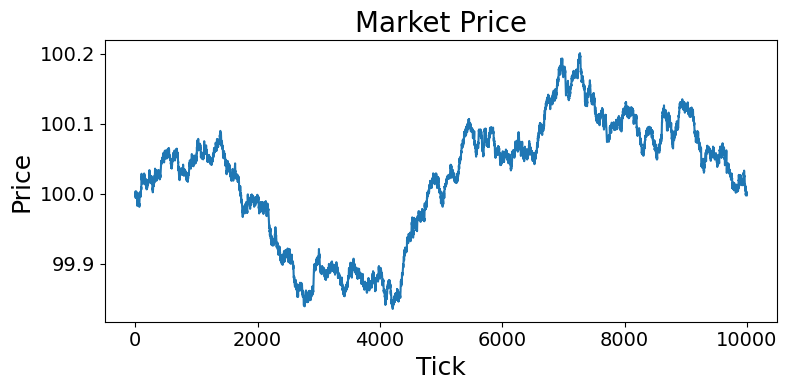

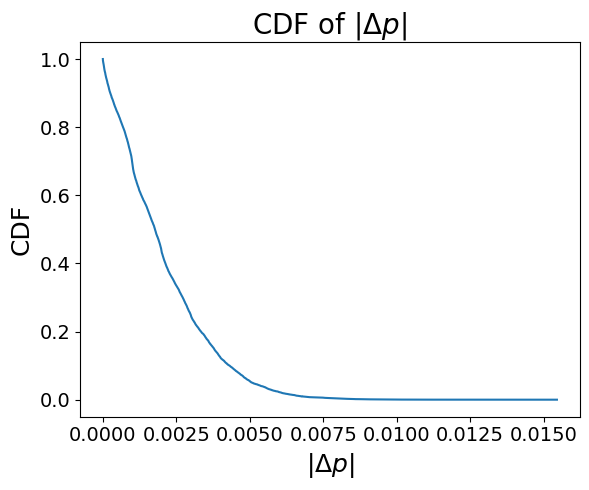

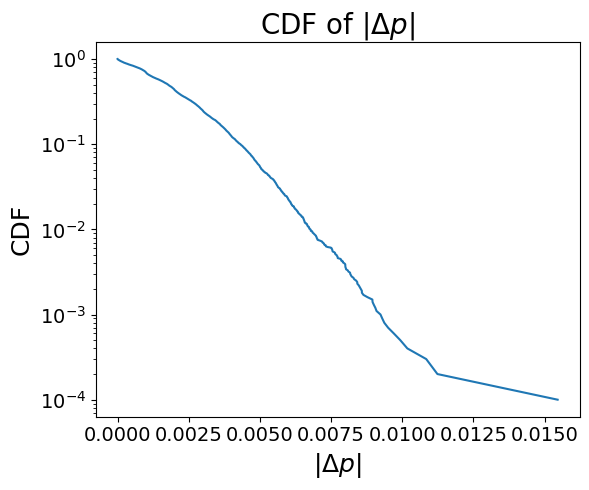

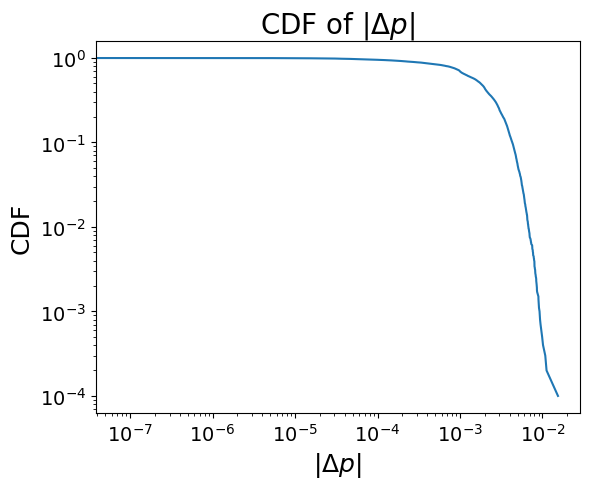

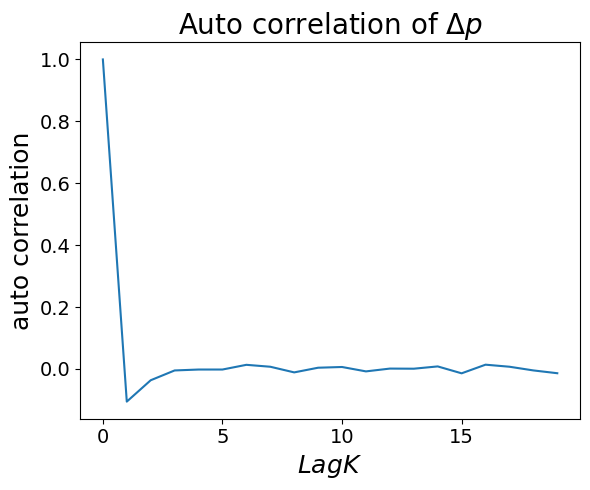

In [8]:
import numpy as np
import answer as ans
import answer_2 as ans2
import vis as vis


# 乱数シードを固定
np.random.seed(1129)

# dealer_model関数実行
market_price_list = ans.dealer_model(N=10, d=1.25, M=1, s=0.02, c=0.01, dp=0.1, dt=0.01, p0=100)

# 可視化
vis.vis_tick_price(market_price_list)
vis.vis_volatility_cdf(market_price_list, scale="normal")
vis.vis_volatility_cdf(market_price_list, scale="semi")
vis.vis_volatility_cdf(market_price_list, scale="log")
vis.vis_auto_correlation(market_price_list)

In [3]:
# 解答例 2
# クラスDelerModelクラスを作り、market_price_listを取得する
model = ans2.DealerModel(N=2, d=1.25, M=2, s=0.01, c=0.01, dp=0.1, dt=0.1*0.1, p0=100)
model.run()
market_price_list = model.market_price_list

Tick:10000/10000, Price:101.6130861877685